In this analysis we will be trying to obtain the best possible model to classify based on the income whether greater 
than 50K or less than 50K.

1. Firstly we will be analysing the given dataset by finding any discrprncies in any feature columns.

2. We will study the dataset to find if there are any missing values, if found we have to analyse them to decide
whether to replace them or remove them. Remember removing the missing values is not always the option. Sometimes 
removing the values can drastically affect the training dataset which may ultimately affect the model accuracy.
Hence we need to study them closely and then decide how to deal with them.

3. We need to study the correlation between all the feature values. Sometimes there are repetative feautre columns but
with different names. If the correlation between the features is found to be close to 1 then we can safely remove
one of them while keeping the other. As removing any one will not affect the performance drastically. This is called
FEATURE REDUCTION.

4. This dataset has categorical values too. The problem with most of the categorical values is repitation of the same
class with different name. To ease our analysis we can combine some of the classes into single class.

5. For simplicity to deal with the categorical values i have used get_dummies method of pandas dataframe. There are
other various methods that you can use to deal with categorical values.

6. FEATURE SELECTION is another important concept which we need to understand while analysing data. So features may
not contribute to the output of our model. Butif include they can affect the result in a not so good way. Hence we
need to remove such features and choose only those that drastically affect the output. Again there are different ways
in which FEATURE SELECTION can be done. But here i have used Univariate feature selection and Recurssive feature 
elimination with cross validation.

THIS ANALYSIS IS BEEN DONE FOR BEGINEERS PERSPECTIVE. THERE IS SO MUCH MORE THAT YOU CAN DO TO GO DEEPER.

HAPPY ANALYSING!!!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
df[df['gender'] == 'Male']['education'].value_counts().values

array([10122,  6185,  5240,  1711,  1284,  1063,   922,   832,   661,
         626,   489,   436,   398,   340,   166,    52], dtype=int64)

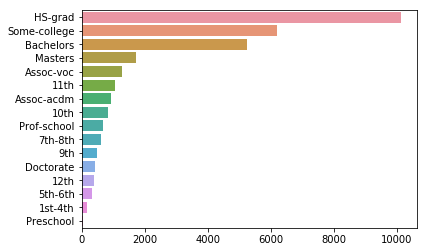

In [14]:
sns.barplot(x = df[df['gender'] == 'Male']['education'].value_counts().values, y = df[df['gender'] == 'Male']['education'].value_counts().index, data = df)

In [3]:
df.shape

(48842, 15)

In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#Check the percentage and number of missing values in feature columns

for i in df.columns:
    non_value = df[i].isin(['?']).sum()
    if non_value > 0:
        print(i)
        print('{}'.format(float(non_value) / (df[i].shape[0]) * 100))
        print('\n')

workclass
5.7307235575938735


occupation
5.751197739650301


native-country
1.7546374022357807




As the percentage of '?' appearing in the three features is less we can safely remove the rows contaning '?'

In [7]:
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']
        

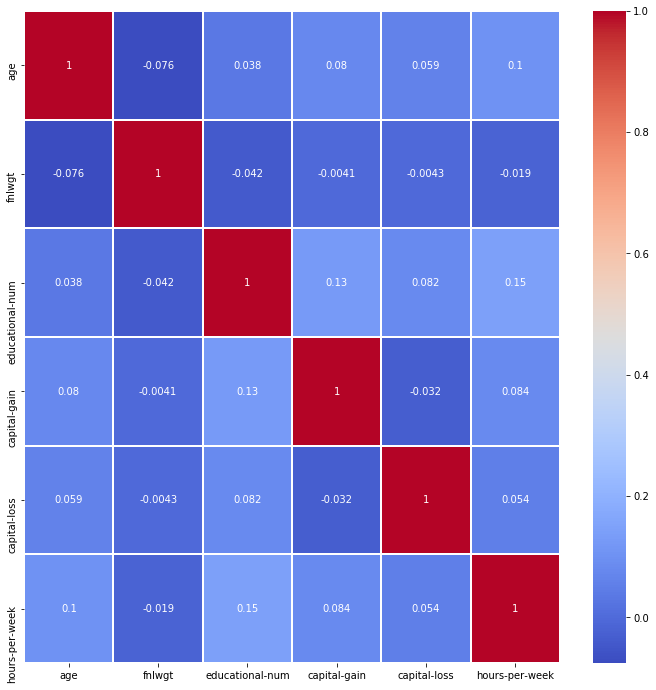

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

In [11]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [54]:
# This 'fnlwgt' feature does'nt seem to make any sense and also the mean value of this feature is too high we can
#remove it

df = df.drop('fnlwgt', axis=1)

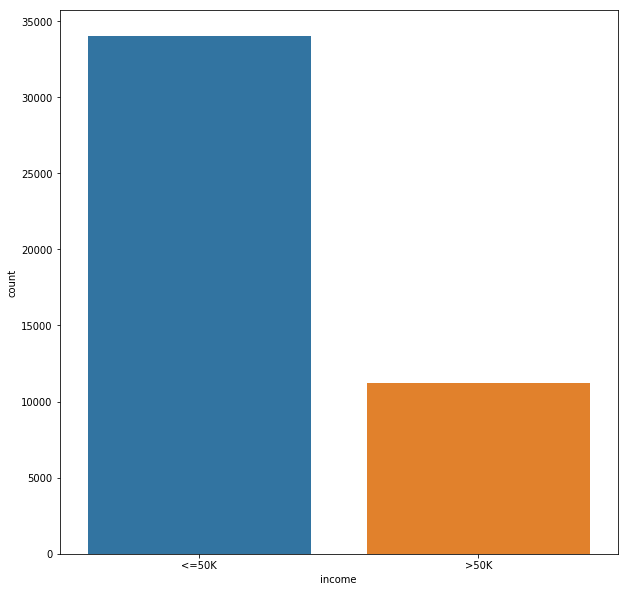

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(df['income'], palette = )
plt.show()

OH my, there seems to be a lot of unbalance in the number of people earning below and above 50K.
Larger number of people seem to earn less than 50K

HEAT MAP is one of the best way to check for any correlation between our features. If strong correlation is found we
can drop any one of the feature.

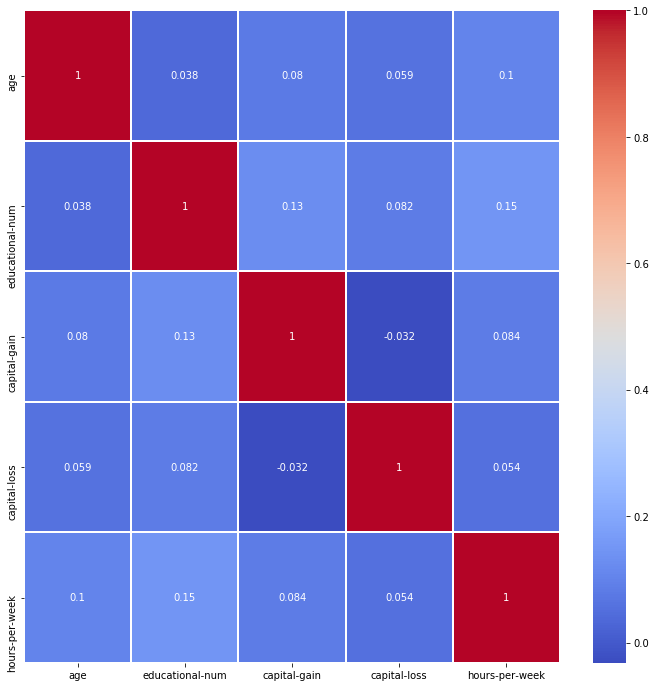

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

As can be observed from the above heatmap the correlation among the features does'nt seem to be strong.
Hence we cannot reduce the number of features by droping few.
We need to try other methods of feture selections

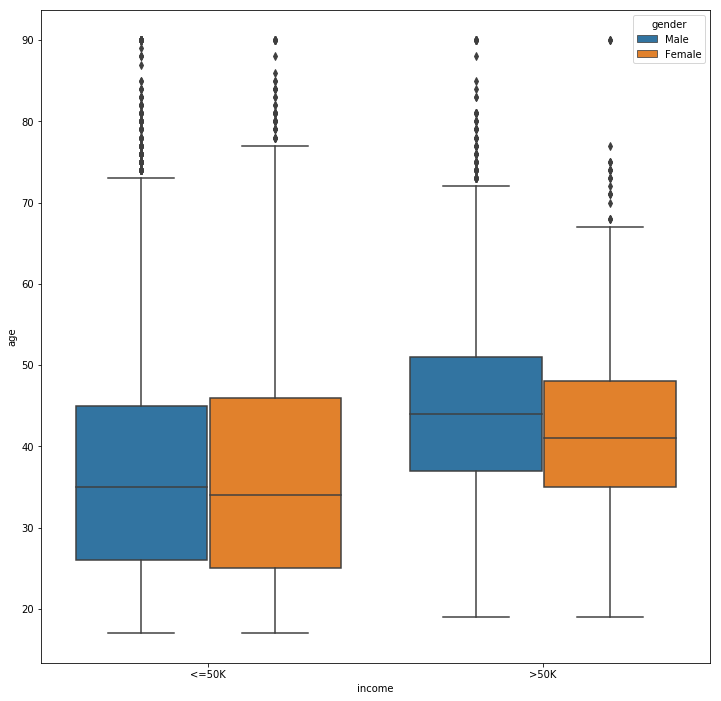

In [15]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='income', y='age', data=df, hue='gender')
plt.show()

1. The above boxplot points out the fact that people with higher age tend to earn more than peoplt with less age.
2. Also male and female earning less than 50K are almost of the same age.
3. Whereas the minimum age of both the gender earning >50K is same, but as the age increases the female counterparts
  tends to earn at a younger age as compared to male counterparts.


# LETS DEAL WITH CATEGORICAL VALUES

On of the most important step in feature cleaning is reducing the repetative feature variables.
The marital statue feature is too much detailed. 
We can reduce the variables in marital status in two variables of married and not married

In [16]:
#Lets check the unique variables of the feature
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)

In [17]:
#Replace the unwanted variables and distribute the variables into two variables namely 'married' and 'not married'

df['marital-status'] = df['marital-status'].replace(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated', 'Divorced',
                                  'Married-spouse-absent', 'Married-AF-spouse'], ['not married', 'married', 'not married',
                                   'not married', 'not married', 'not married', 'married'])

In [18]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,not married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,not married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Lets convert all the catagorical features into dummy variables using get_dummies method.

In [19]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'gender',
                           'native-country'], drop_first=True)

In [20]:
df.head()  #gives the output as first five rows of the dataframe

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,>50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,>50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Split the dataframe into features (X) and labels(y)
X = df.drop('income', axis=1)
y = df['income']

In [22]:
y = pd.get_dummies(y, columns=y, drop_first=True)
y = y.iloc[:,-1]
y.shape

(45222,)

In [23]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [24]:
y_test.shape

(9045,)

All the catagorical values are converted inot dummy values.

Now we can start studying for FEATURE SELECTION

# FEATURE SELECTION

Well there are various methods for feature selection such as:

1. Feature selection with correlation.
2. Univariate feature selection. (This is what i have used in this kernel)
3. Recursive feature elimination (RFE)
4. RFE with cross validation.

You can try any one or all of these to find the optimum model and corresponding parameters of that model and also 
try to improve the accuracy of the model by varying the feature selection methods.


# UNIVARIATE FEATURE SELECTION

In univariate feature selection we select the k highest features and negelect the other ones.
K is the variable indicating the features with highest impact.

In [25]:
feature_select = SelectKBest(chi2, k = 8)  #finding the top 8 best features
feature_select.fit(X_train, y_train)

SelectKBest(k=8, score_func=<function chi2 at 0x0000004E040A0AE8>)

In [26]:
score_list = feature_select.scores_
top_features = X_train.columns

In [27]:
uni_features = list(zip(score_list, top_features))
print(sorted(uni_features, reverse=True)[0:8])

[(89731658.625599772, 'capital-gain'), (1426870.7275412083, 'capital-loss'), (9058.6630678916626, 'age'), (6418.9547421265852, 'hours-per-week'), (3341.9406572228977, 'marital-status_not married'), (2553.2575093758687, 'educational-num'), (1550.5330836394578, 'relationship_Own-child'), (1298.6807139811253, 'occupation_Exec-managerial')]


This gives the top 8 features 

We will train the model on these features and find the performance

# 1. RANDOM FOREST 

Accuracy is:  0.840574903261


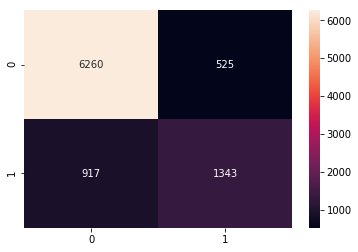

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_1 = feature_select.transform(X_train)
X_test_1 = feature_select.transform(X_test)

#random forest classifier with n_estimators=10 (default)
rf_clf = RandomForestClassifier()      
rf_clf.fit(X_train_1,y_train)

rf_pred = rf_clf.predict(X_test_1)

accu_rf = accuracy_score(y_test, rf_pred)
print('Accuracy is: ',accu_rf)

cm_1 = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_1, annot=True, fmt="d")
plt.show()

We got 84% of accuracy.

Still lot of our predictions seem to be wrong looking at the heatmap.
One thing can be done is to change the number of top features and give a trial and error method in order to improve
the efficiency.

# 2. K NEAREST NEIGHBORS

Accuracy is:  0.811608623549


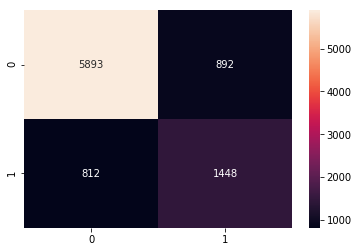

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_2 = feature_select.transform(X_train)
X_test_2 = feature_select.transform(X_test)


knn_clf = KNeighborsClassifier(n_neighbors=1)      
knn_clf.fit(X_train_2,y_train)

knn_pred = knn_clf.predict(X_test_2)

accu_knn = accuracy_score(y_test, knn_pred)
print('Accuracy is: ',accu_knn)

cm_2 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_2, annot=True, fmt="d")
plt.show()

In [30]:
accu_score = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_2, y_train)
    prediction = knn.predict(X_test_2)
    accu_score.append(accuracy_score(prediction, y_test))

In [31]:
plt.plot(range(1, 50), accu_score)

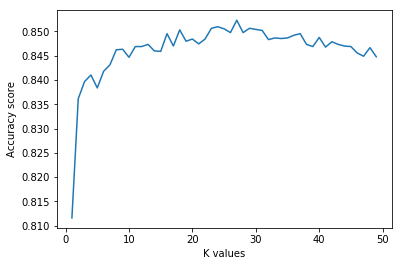

In [32]:
import matplotlib.pyplot as plt

plt.xlabel('K values')
plt.ylabel('Accuracy score')
plt.show()

Accuracy is:  0.849751243781


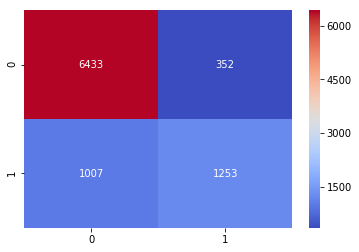

In [33]:
X_train_3 = feature_select.transform(X_train)
X_test_3 = feature_select.transform(X_test)


knn_clf_1 = KNeighborsClassifier(n_neighbors=28)      
knn_clf_1.fit(X_train_2,y_train)

knn_pred_1 = knn_clf_1.predict(X_test_2)

accu_knn_1 = accuracy_score(y_test, knn_pred_1)
print('Accuracy is: ',accu_knn_1)

cm_3 = confusion_matrix(y_test, knn_pred_1)
sns.heatmap(cm_3, annot=True, fmt="d", cmap='coolwarm')
plt.show()

As it can be observed from the above heat map, by finding the optimal value of k the accuracy increased from 81%
to 85%

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

kfold = KFold(n_splits = 10, random_state = 5)

result = cross_val_score(rf, X_train_1, y_train, cv=kfold, scoring='accuracy')

print(result.mean())

0.836802165561


# RFE WITH CROSS-VALIDATION AND RF CLASSIFICATION

In [37]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_3 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 3
Best features : Index(['educational-num', 'capital-gain', 'marital-status_not married'], dtype='object')


We got optimal number of features as 3 in order to get the maximum accuracy of the model.

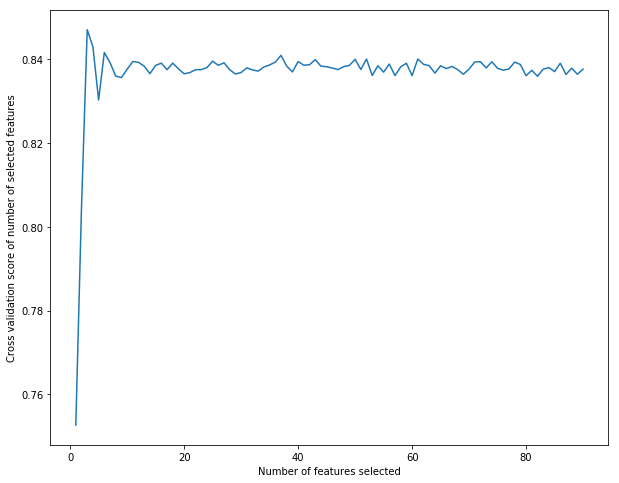

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

As can be interpreted from the above graph for number of selected features to be 3 we obtain a cross-validation score
of about 86%. Which is a slight increase from the optimal K nearest neighbors.

##At the end all i want to conclude is that there are many more ways and algorithms that you can use to keep on 
improving the accuracy of the model.

By applying minor tweaks and changing and optimising the parameters of the model you can try to improve the 
performance of the model.